In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
#read RFMiD csv data RFMiD\Training_Set\Training_Set\RFMiD_Training_Labels.csv
rfmid_train = pd.read_csv('./RFMiD/Training_Set/RFMiD_Training_Labels.csv')
rfmid_test = pd.read_csv('./RFMiD/Test_Set/RFMiD_Testing_Labels.csv')
rfmid_val = pd.read_csv('./RFMiD/Evaluation_Set/RFMiD_Validation_Labels.csv')

In [27]:
rfmid_train.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
rfmid_all = pd.concat([rfmid_train, rfmid_test, rfmid_val])

In [29]:
#get data from RFMiD2 dataset
encoding_rfmid2 = 'ISO-8859-1'
rfmid2_train = pd.read_csv('RFMiD2_0/Training_set/RFMiD_2_Training_labels.csv', encoding= encoding_rfmid2)
rfmid2_test = pd.read_csv('RFMiD2_0/Test_set/RFMiD_2_Testing_labels.csv', encoding= encoding_rfmid2)
rfmid2_val = pd.read_csv('RFMiD2_0/Validation_set/RFMiD_2_Validation_labels.csv', encoding= encoding_rfmid2)

In [30]:
#concatenate all data from RFMiD2
rfmid2_all = pd.concat([rfmid2_train, rfmid2_test, rfmid2_val])

In [31]:
rfmid2_all.head()

,ID,WNL,AH,AION,ARMD,BRVO,CB,CF,CL,CME,...,RT,SOFE,ST,TD,TSLN,TV,VS,HTN,IIH,Unnamed: 52
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [32]:
#print len of both datasets
print("RFMiD1: ", len(rfmid_all))
print("RFMiD2: ", len(rfmid2_all))

RFMiD1:  3200
RFMiD2:  860


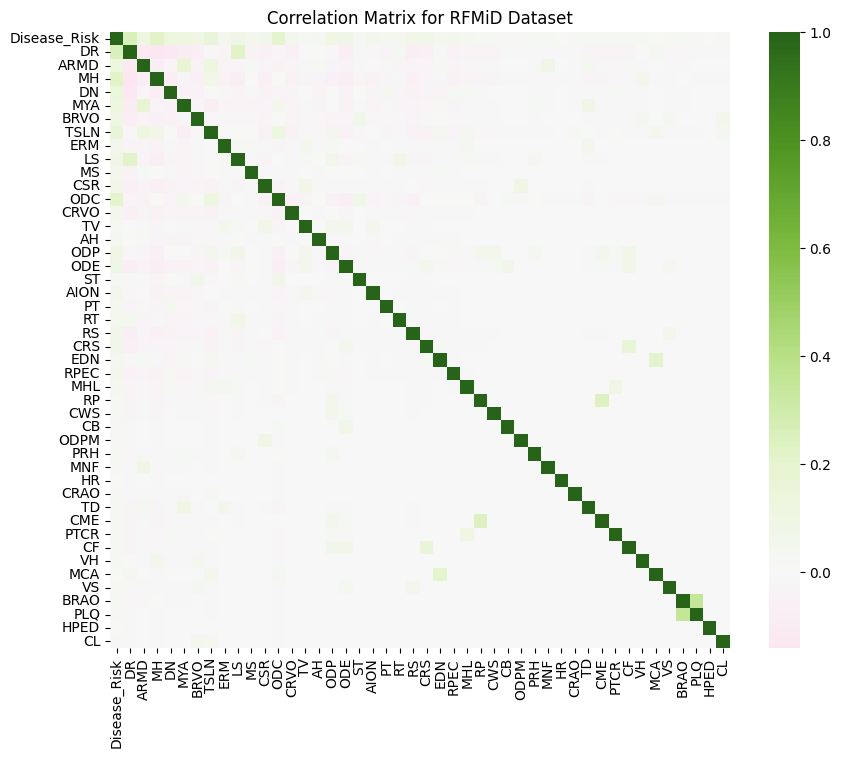

Text(0.5, 1.0, 'Correlation Matrix for RFMiD2 Dataset')

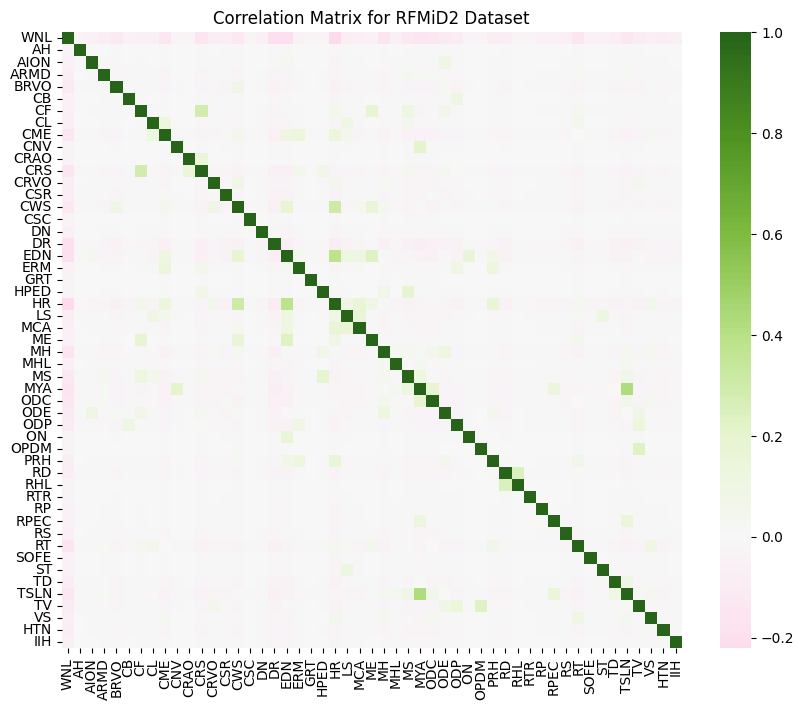

In [33]:
import seaborn as sns
#correlations in rfmid datasets with heatmap
rfmid_corr_df = rfmid_all.drop(['ID'], axis=1)
rfmid_corr = rfmid_corr_df.corr()

rfmid2_corr_df = rfmid2_all.drop(['ID', 'Unnamed: 52'], axis=1)
rfmid2_corr = rfmid2_corr_df.corr()
#plot heatmaps
cmap = "PiYG"
center = 0
plt.figure(figsize=(10, 8))
sns.heatmap(rfmid_corr, cmap=cmap, center=center, xticklabels=1, yticklabels=1)
plt.xticks(rotation=90)
plt.title('Correlation Matrix for RFMiD Dataset')
plt.show()
#plot rfmid2 heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(rfmid2_corr, cmap=cmap, center=center, xticklabels=1, yticklabels=1)
plt.title('Correlation Matrix for RFMiD2 Dataset')

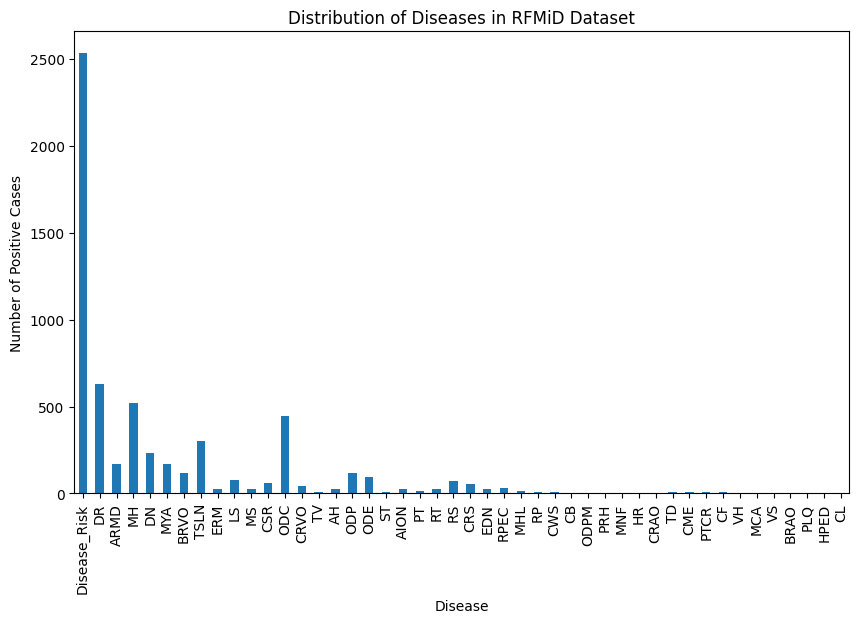

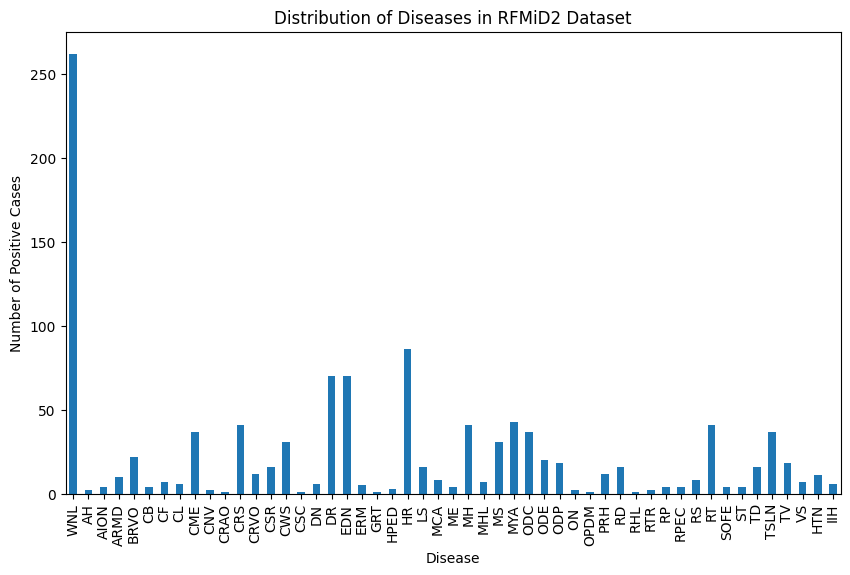

In [34]:
# pivot corr df
import matplotlib.pyplot as plt

# Sum up the positive cases for each disease
disease_counts = rfmid_corr_df.sum()

# Create a bar plot
plt.figure(figsize=(10,6))
disease_counts.plot(kind='bar')
plt.title('Distribution of Diseases in RFMiD Dataset')
plt.xlabel('Disease')
plt.ylabel('Number of Positive Cases')
plt.show()

#do the same for rfmid2
disease_counts2 = rfmid2_corr_df.sum()
# Create a bar plot
plt.figure(figsize=(10,6))
disease_counts2.plot(kind='bar')
plt.title('Distribution of Diseases in RFMiD2 Dataset')
plt.xlabel('Disease')
plt.ylabel('Number of Positive Cases')
plt.show()

In [35]:
#find out which columns are correlated to the rp column
corr_rp = rfmid_corr['RP']
corr_rp = corr_rp.drop(['RP'])
corr_rp = corr_rp[abs(corr_rp) > 0.2]
corr_rp
# conclusion there is no disease that is highly correlated to RP in the RFMiD dataset

CME    0.237061
Name: RP, dtype: float64

In [36]:
#find out which columns are correlated to the rp column
corr_rp = rfmid2_corr['RP']
corr_rp = corr_rp.drop(['RP'])
corr_rp = corr_rp[abs(corr_rp) > 0.2]
corr_rp
# conclusion there is no disease that is highly correlated to RP in the RFMiD2 dataset

Series([], Name: RP, dtype: float64)

In [37]:
#load odir5k dataset from excel file
odir5k = pd.read_excel('./ODIR-5k/data.xlsx')
odir5k.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [38]:
#correlations in odir5k dataset with heatmap
# add conditional binary column for patient sex
odir5k['Patient Sex binary'] = odir5k['Patient Sex'].apply(lambda x: 0 if x == 'Male' else 1)

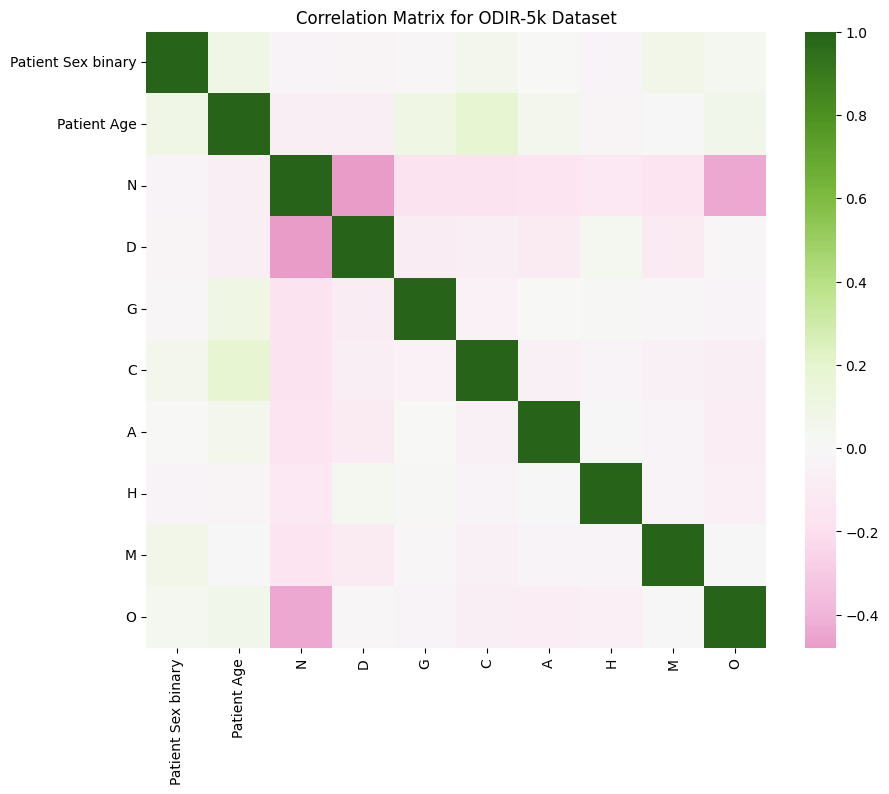

In [39]:
odir5k_corr_df = odir5k[['Patient Sex binary', 'Patient Age', 'N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']]
odir5k_corr = odir5k_corr_df.corr()
#plot heatmap of odir5k
plt.figure(figsize=(10, 8))
sns.heatmap(odir5k_corr, cmap=cmap, center=center, xticklabels=1, yticklabels=1)
plt.title('Correlation Matrix for ODIR-5k Dataset')
plt.show()
#results show that some correlations in here exist between the diseases, but no correlation regarding the sex or age of the patient

In [40]:
#check how often the left eye diagnosis keywords matches the right eye diagnosis keywords
equal_cases = odir5k['Left-Diagnostic Keywords'].eq(odir5k['Right-Diagnostic Keywords']).sum()
print(f'In {equal_cases / len(odir5k)} % of the cases Left-Diagnostic Keyword is equal to Right-Diagnostic Keyword.')

#which is the most common value in the left eye and right eye diagnosis keywords if they are not equal?
not_equal_cases = odir5k['Left-Diagnostic Keywords'].ne(odir5k['Right-Diagnostic Keywords'])
#most common value in left eye
odir5k['Left-Diagnostic Keywords'][not_equal_cases].value_counts().idxmax()
#most common value in right eye
odir5k['Right-Diagnostic Keywords'][not_equal_cases].value_counts().idxmax()
#print the most common value in the left eye and right eye diagnosis keywords if they are not equal
print(f'The most common value in the left eye diagnosis keywords is {odir5k["Left-Diagnostic Keywords"][not_equal_cases].value_counts().idxmax()} if they are not equal.')
print(f'The most common value in the right eye diagnosis keywords is {odir5k["Right-Diagnostic Keywords"][not_equal_cases].value_counts().idxmax()} if they are not equal.')

In 0.5531428571428572 % of the cases Left-Diagnostic Keyword is equal to Right-Diagnostic Keyword.
The most common value in the left eye diagnosis keywords is normal fundus if they are not equal.
The most common value in the right eye diagnosis keywords is normal fundus if they are not equal.


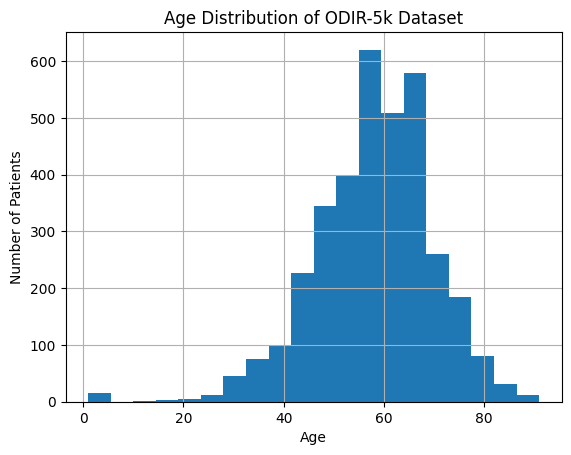

Text(0.5, 1.0, 'Gender Distribution of ODIR-5k Dataset')

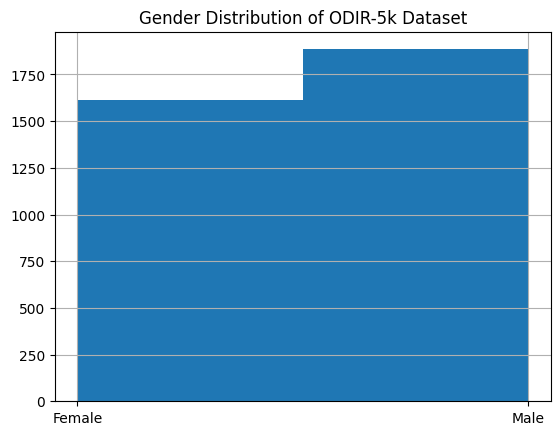

In [41]:
#see the age distribution of the patients
odir5k['Patient Age'].hist(bins=20)
plt.title('Age Distribution of ODIR-5k Dataset')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()
#show patient sex distribution
odir5k['Patient Sex'].hist(bins=2)
plt.title('Gender Distribution of ODIR-5k Dataset')

In [42]:
#create a set of all unique diagnosis keywords
diagnosis_keywords = []
for index, row in odir5k.iterrows():
    #remove spaces and split by comma
    #check if there is a comma in the strin

    left_diagnosis = row['Left-Diagnostic Keywords'].split('，')
    right_diagnosis = row['Right-Diagnostic Keywords'].split('，')
    #print(type(left_diagnosis), len(left_diagnosis),  left_diagnosis)
    #print(type(right_diagnosis), len(right_diagnosis), right_diagnosis)
    diagnosis_keywords.extend(left_diagnosis)
    diagnosis_keywords.extend(right_diagnosis)
diagnosis_keywords_df = pd.DataFrame({'diagnosis_keyword': diagnosis_keywords})
diagnosis_keywords_df.head(200)


,diagnosis_keyword
0,cataract
1,normal fundus
2,normal fundus
3,normal fundus
4,laser spot
...,...
195,lens dust
196,normal fundus
197,lens dust
198,myelinated nerve fibers


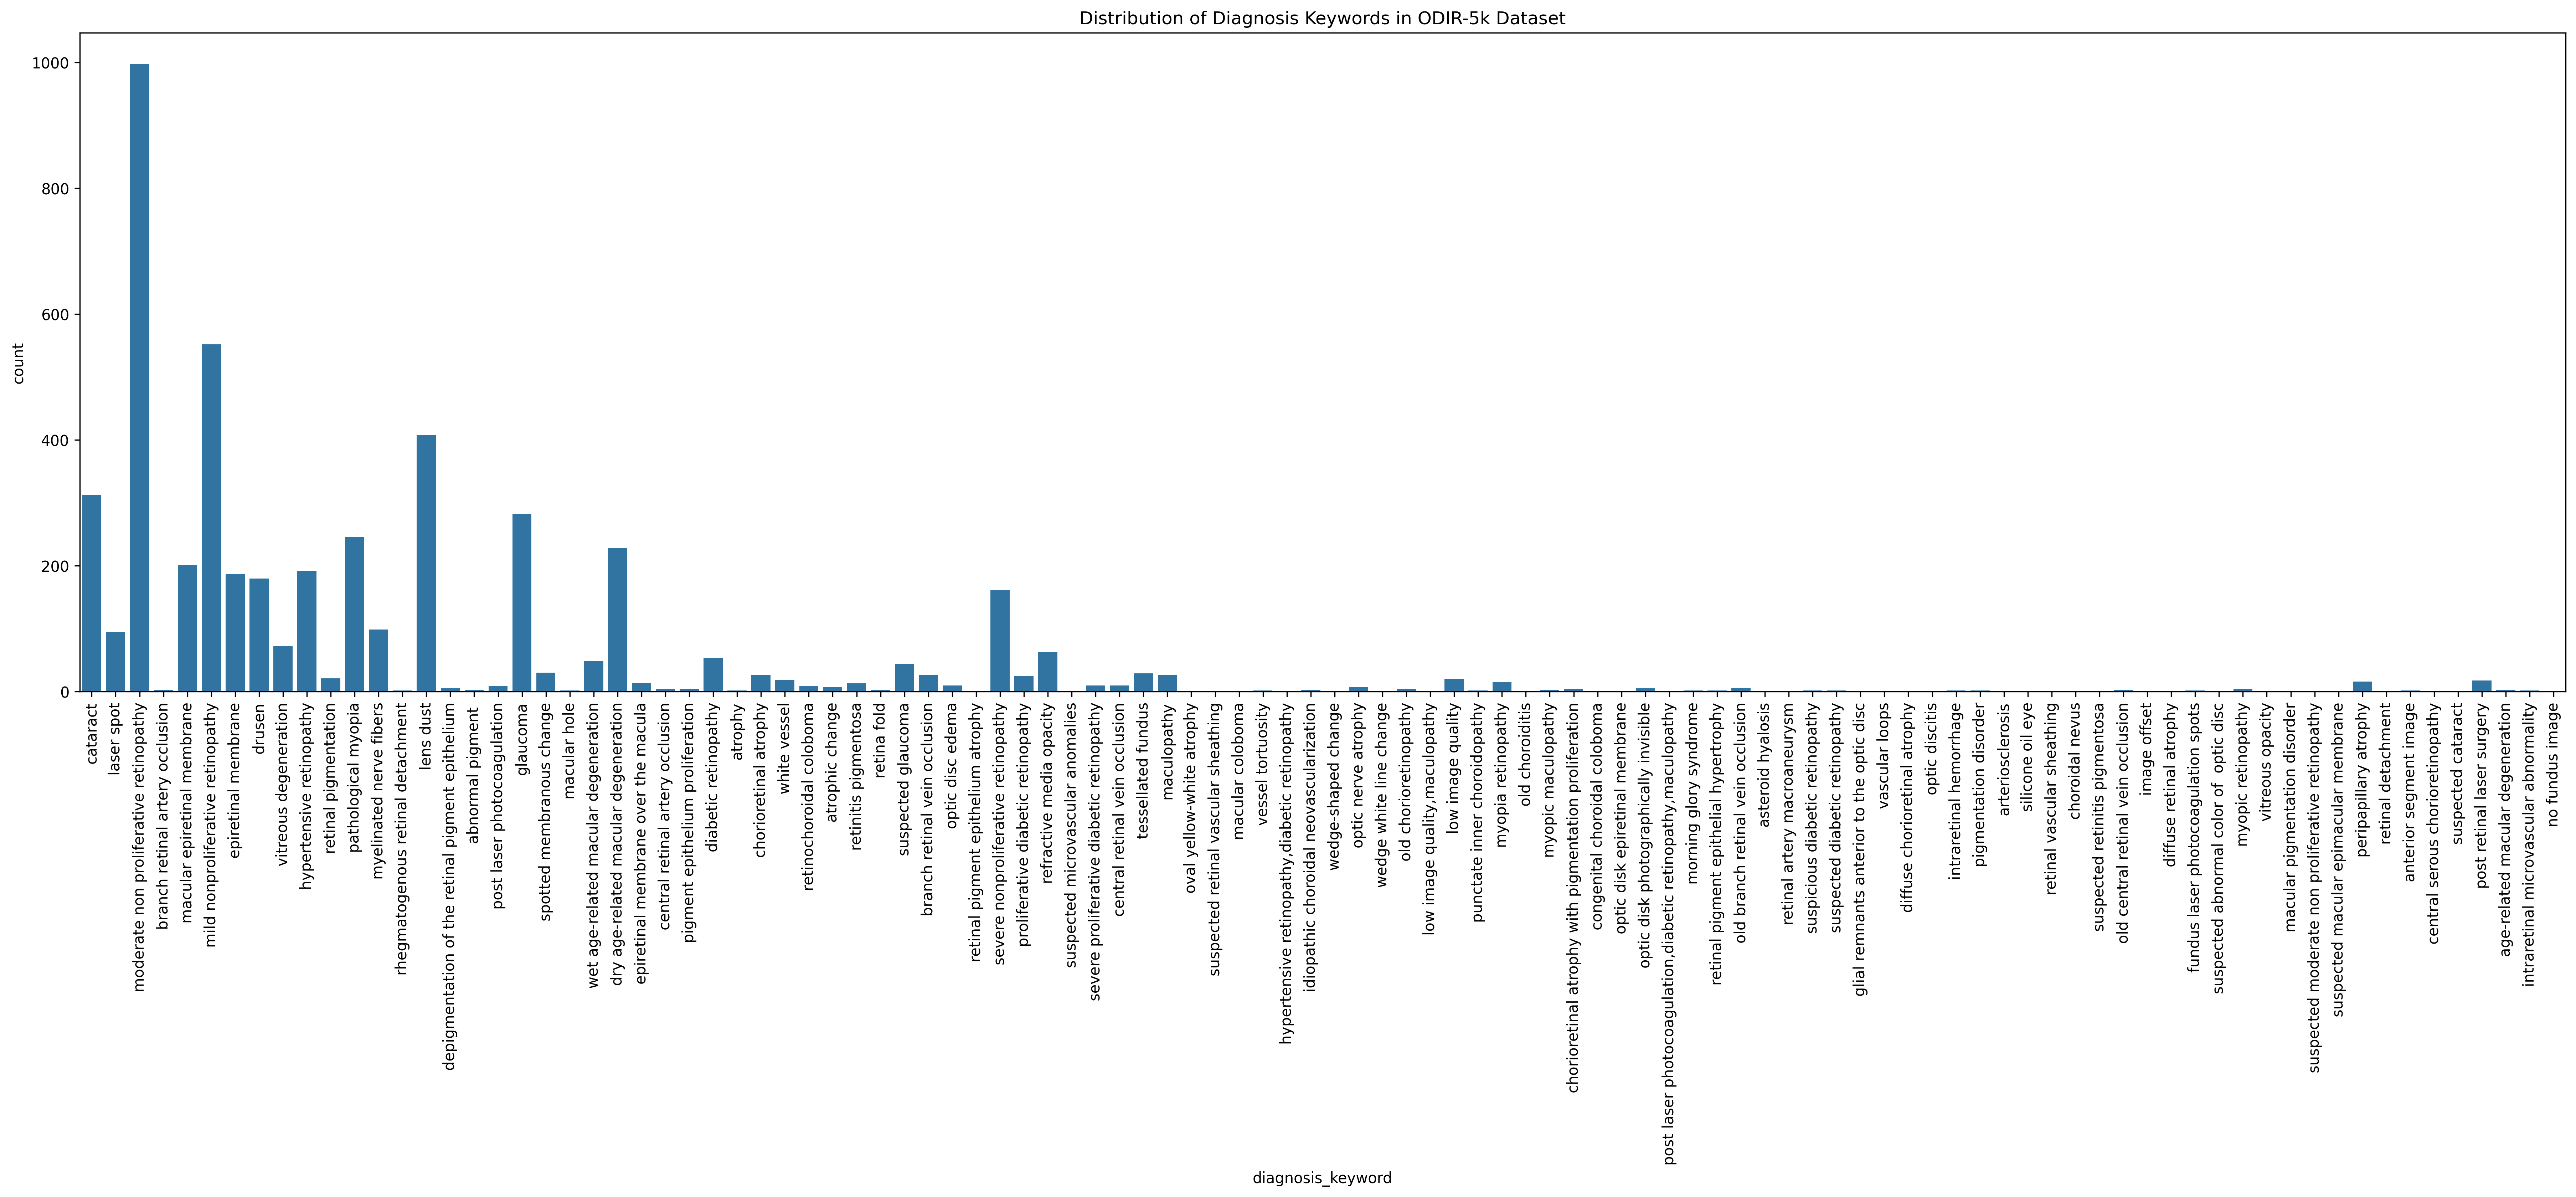

In [43]:
#plot the distribution of the diagnosis keywords, exclude normal fundus
diagnosis_keywords_df = diagnosis_keywords_df[diagnosis_keywords_df['diagnosis_keyword'] != 'normal fundus']
plt.figure(figsize=(30, 8), dpi=300)
sns.countplot(x='diagnosis_keyword', data=diagnosis_keywords_df)
plt.xticks(rotation=90)
plt.title('Distribution of Diagnosis Keywords in ODIR-5k Dataset')
plt.show()

In [44]:
#check how many folders are in the 1000 images folder
import os
path, dirs, files = next(os.walk("./1000images"))
class_count = len(dirs)
print(f'There are {class_count} classes in the 1000 images folder.')

There are 39 classes in the 1000 images folder.


In [45]:
#check how many images each folder contains
class_count_map = {}
for folder in dirs:
    print(folder)
    path, dirs, files = next(os.walk(f"./1000images/{folder}"))
    file_count = len(files)
    #remove digits from folder name
    class_name = ''.join([i for i in folder if not i.isdigit()])
    class_count_map[class_name] = file_count

print(class_count_map)

0.0.Normal
0.1.Tessellated fundus
0.2.Large optic cup
0.3.DR1
1.0.DR2
1.1.DR3
10.0.Possible glaucoma
10.1.Optic atrophy
11.Severe hypertensive retinopathy
12.Disc swelling and elevation
13.Dragged Disc
14.Congenital disc abnormality
15.0.Retinitis pigmentosa
15.1.Bietti crystalline dystrophy
16.Peripheral retinal degeneration and break
17.Myelinated nerve fiber
18.Vitreous particles
19.Fundus neoplasm
2.0.BRVO
2.1.CRVO
20.Massive hard exudates
21.Yellow-white spots-flecks
22.Cotton-wool spots
23.Vessel tortuosity
24.Chorioretinal atrophy-coloboma
25.Preretinal hemorrhage
26.Fibrosis
27.Laser Spots
28.Silicon oil in eye
29.0.Blur fundus without PDR
29.1.Blur fundus with suspected PDR
3.RAO
4.Rhegmatogenous RD
5.0.CSCR
5.1.VKH disease
6.Maculopathy
7.ERM
8.MH
9.Pathological myopia
{'..Normal': 38, '..Tessellated fundus': 13, '..Large optic cup': 50, '..DR': 39, '..Possible glaucoma': 13, '..Optic atrophy': 12, '.Severe hypertensive retinopathy': 15, '.Disc swelling and elevation': 13, '.

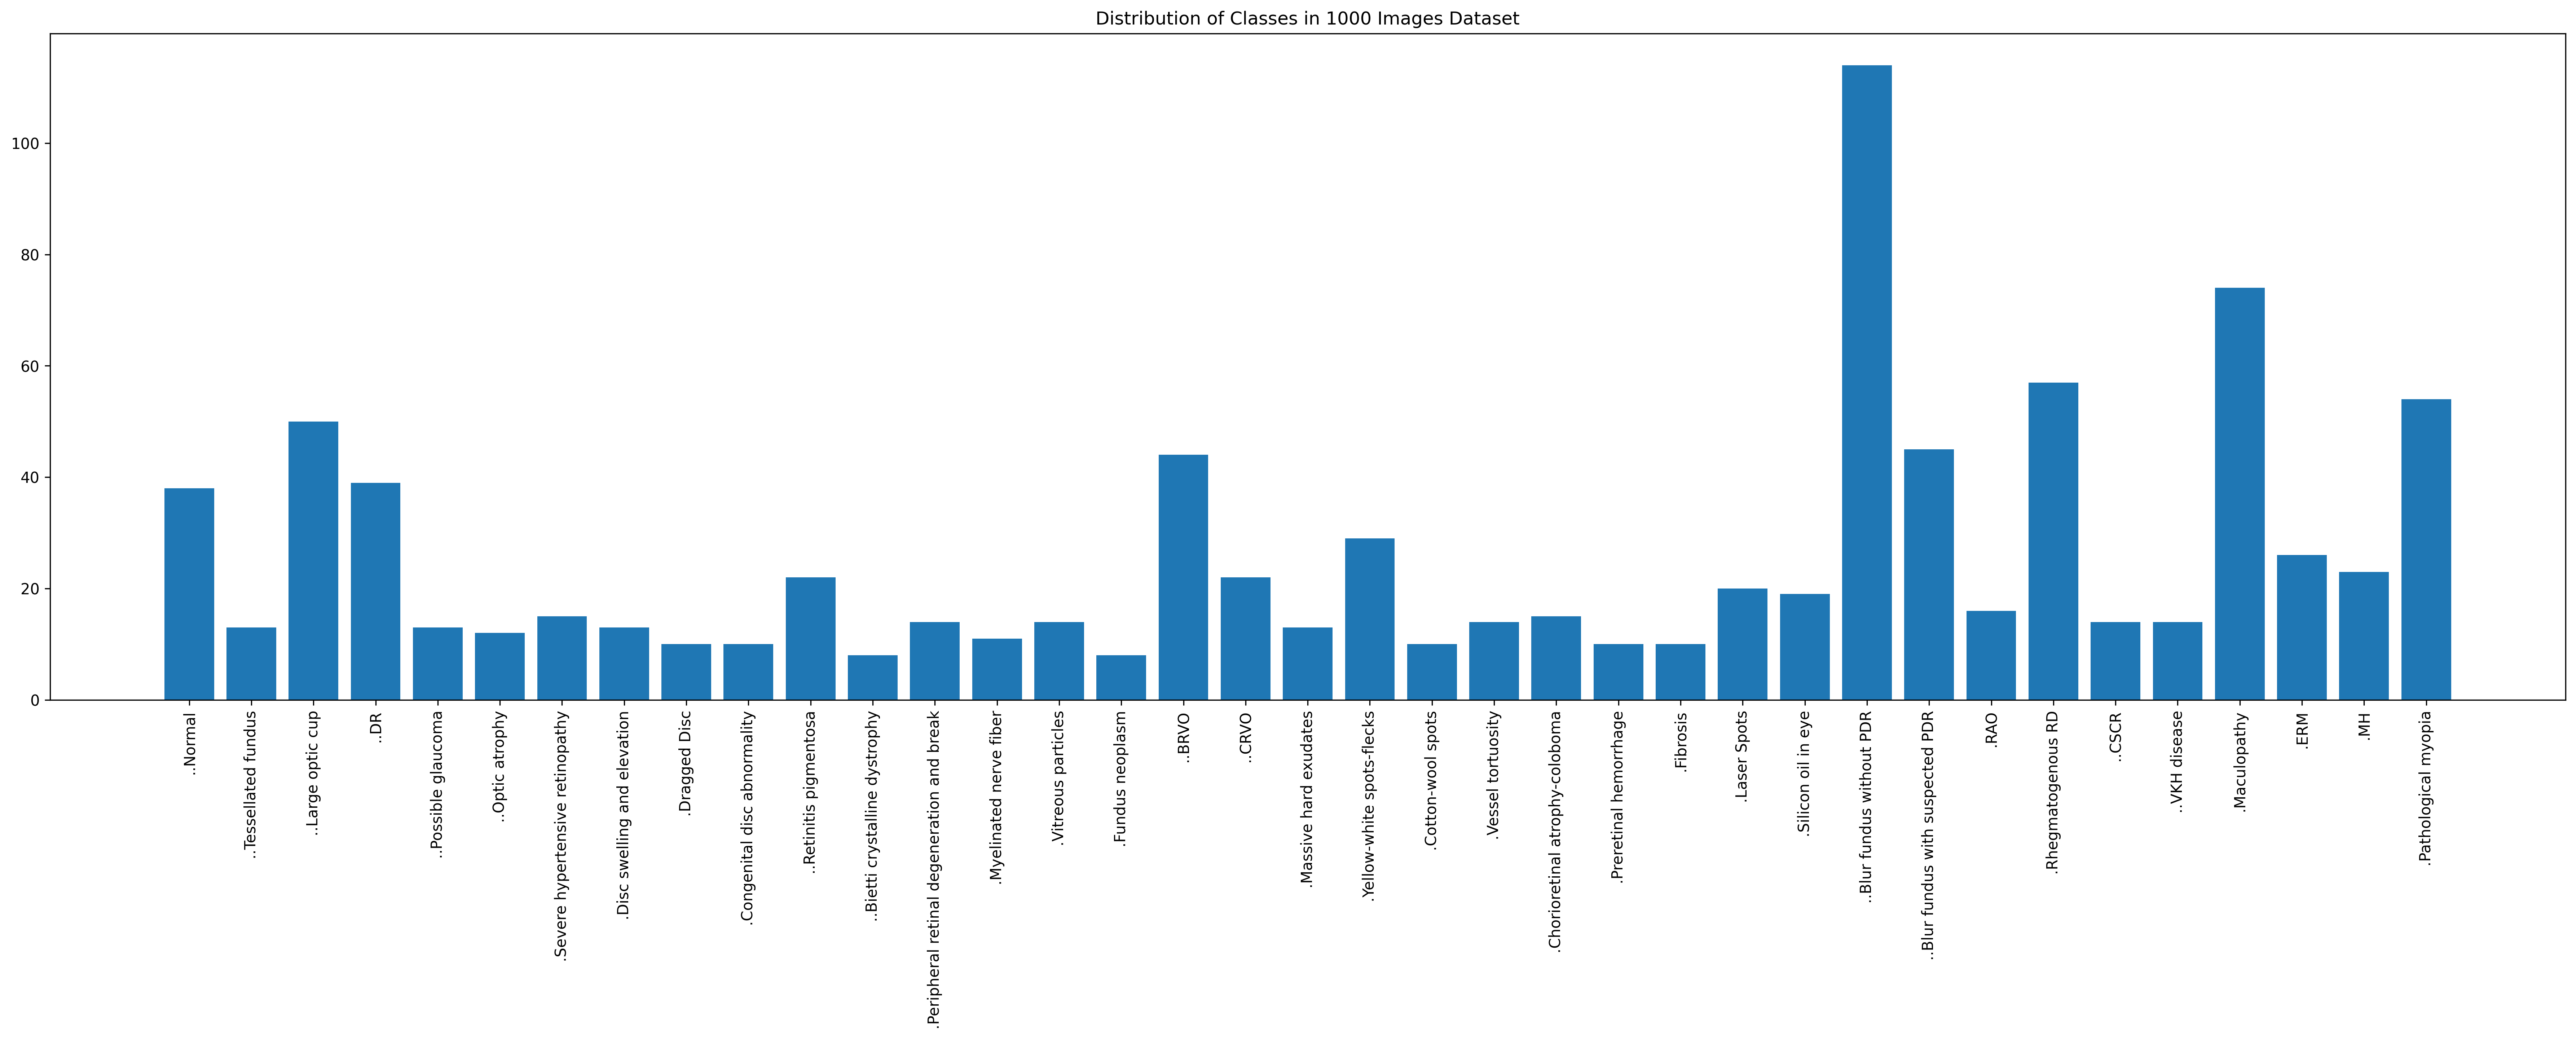

In [46]:
#plot class distribution
plt.figure(figsize=(30, 8), dpi=300)
plt.bar(class_count_map.keys(), class_count_map.values())
plt.xticks(rotation=90)
plt.title('Distribution of Classes in 1000 Images Dataset')
plt.show()

In [47]:
#create a dataset of normal images from odir5k
left_normal_images = odir5k[odir5k['Left-Diagnostic Keywords'] == 'normal fundus']
right_normal_images = odir5k[odir5k['Right-Diagnostic Keywords'] == 'normal fundus']
#extract images in odir5k based on the left_fundus and right_fundus columns
import shutil
import os
import glob
from pathlib import Path
#copy all normal images from odir5k to a new folder
#print current directory
print(os.getcwd())
for index, row in left_normal_images.iterrows():
    #copy left image
    image_name = row['Left-Fundus']
    #create directory if it does not exist
    Path(f'./ODIR-5k/Training Images/normal').mkdir(parents=True, exist_ok=True)
    shutil.copy(f'./ODIR-5k/Training Images/{image_name}', f'./ODIR-5k/Training Images/normal/{image_name}')

c:\Users\elyes\IRD-DeepLearning


In [48]:
#extract rfmid armd images
rfmid_armd = rfmid_all[rfmid_all['ARMD'] == 1]
for id in rfmid_armd['ID']:
    #image file name
    image_name = f'{id}.png'
    #create directory if it does not exist
    Path(f'./RFMiD/Training_Set/ARMD').mkdir(parents=True, exist_ok=True)
    shutil.copy(f'./RFMiD/Training_Set/Training/{image_name}', f'./RFMiD/Training_Set/ARMD/{image_name}')


In [55]:
#extract rfmid rp images
rfmid_normal = rfmid_all[rfmid_all['Disease_Risk'] == 0]
for id in rfmid_armd['ID']:
    #image file name
    image_name = f'{id}.png'
    #create directory if it does not exist
    Path(f'./RFMiD/Training_Set/normal').mkdir(parents=True, exist_ok=True)
    shutil.copy(f'./RFMiD/Training_Set/Training/{image_name}', f'./RFMiD/Training_Set/normal/{image_name}')

In [ ]:
#extract rfmid rp images
rfmid_rp = rfmid_all[rfmid_all['RP'] == 1]
for id in rfmid_armd['ID']:
    #image file name
    image_name = f'{id}.png'
    #create directory if it does not exist
    Path(f'./RFMiD/Training_Set/RP').mkdir(parents=True, exist_ok=True)
    shutil.copy(f'./RFMiD/Training_Set/Training/{image_name}', f'./RFMiD/Training_Set/RP/{image_name}')

In [52]:
#create rfmid2 rp images
rfmid2_rp = rfmid2_all[rfmid2_all['RP'] == 1]
for id in rfmid2_rp['ID']:
    #image file name
    image_name = f'{id}.jpg'
    #create directory if it does not exist
    Path(f'./RFMiD2_0/Training_set/RP').mkdir(parents=True, exist_ok=True)
    #check if image exists
    if os.path.exists(f'./RFMiD2_0/Training_set/{image_name}'):
        shutil.copy(f'./RFMiD2_0/Training_set/{image_name}', f'./RFMiD2_0/Training_set/RP/{image_name}')

In [ ]:
#create rfmid2 rp images
rfmid2_rp = rfmid2_all[rfmid2_all['RP'] == 1]
for id in rfmid2_rp['ID']:
    #image file name
    image_name = f'{id}.jpg'
    #create directory if it does not exist
    Path(f'./RFMiD2_0/Training_set/RP').mkdir(parents=True, exist_ok=True)
    #check if image exists
    if os.path.exists(f'./RFMiD2_0/Training_set/{image_name}'):
        shutil.copy(f'./RFMiD2_0/Training_set/{image_name}', f'./RFMiD2_0/Training_set/RP/{image_name}')

In [57]:
#extract rfmid2 normal (wnl) images
rfmid2_wnl = rfmid2_all[rfmid2_all['WNL'] == 1]
for id in rfmid2_wnl['ID']:
    #image file name
    image_name = f'{id}.jpg'
    #create directory if it does not exist
    Path(f'./RFMiD2_0/Training_set/normal').mkdir(parents=True, exist_ok=True)
    #check if image exists
    if os.path.exists(f'./RFMiD2_0/Training_set/{image_name}'):
        shutil.copy(f'./RFMiD2_0/Training_set/{image_name}', f'./RFMiD2_0/Training_set/normal/{image_name}')

In [58]:
#extract rfmid2 armd images
rfmid2_armd = rfmid2_all[rfmid2_all['ARMD'] == 1]
for id in rfmid2_armd['ID']:
    #image file name
    image_name = f'{id}.jpg'
    #create directory if it does not exist
    Path(f'./RFMiD2_0/Training_set/ARMD').mkdir(parents=True, exist_ok=True)
    #check if image exists
    if os.path.exists(f'./RFMiD2_0/Training_set/{image_name}'):
        shutil.copy(f'./RFMiD2_0/Training_set/{image_name}', f'./RFMiD2_0/Training_set/ARMD/{image_name}')

In [54]:
#extract rp images from odir5k, the ones where the left and right diagnosis keywords contain retinitis pigmentosa
left_rp_images = odir5k[odir5k['Left-Diagnostic Keywords'].str.contains('retinitis pigmentosa')]
right_rp_images = odir5k[odir5k['Right-Diagnostic Keywords'].str.contains('retinitis pigmentosa')]
#copy images to a new folder
for index, row in left_rp_images.iterrows():
    #copy left image
    image_name = row['Left-Fundus']
    #create directory if it does not exist
    Path(f'./ODIR-5k/Training Images/RP').mkdir(parents=True, exist_ok=True)
    shutil.copy(f'./ODIR-5k/Training Images/{image_name}', f'./ODIR-5k/Training Images/RP/{image_name}')
#do the same for the right images
for index, row in right_rp_images.iterrows():
    #copy left image
    image_name = row['Right-Fundus']
    #create directory if it does not exist
    Path(f'./ODIR-5k/Training Images/RP').mkdir(parents=True, exist_ok=True)
    shutil.copy(f'./ODIR-5k/Training Images/{image_name}', f'./ODIR-5k/Training Images/RP/{image_name}')

In [61]:
#do the same for wet age related macular degeneration and dry age related macular degeneration
#extract armd images from odir5k, the ones where the left and right diagnosis keywords contain age related macular degeneration
left_armd_images = odir5k[odir5k['Left-Diagnostic Keywords'].str.contains('age-related macular degeneration')]
right_armd_images = odir5k[odir5k['Right-Diagnostic Keywords'].str.contains('age-related macular degeneration')]
#copy images to a new folder
for index, row in left_armd_images.iterrows():
    #copy left image
    image_name = row['Left-Fundus']
    #create directory if it does not exist
    Path(f'./ODIR-5k/Training Images/ARMD').mkdir(parents=True, exist_ok=True)
    shutil.copy(f'./ODIR-5k/Training Images/{image_name}', f'./ODIR-5k/Training Images/ARMD/{image_name}')
#do the same for the right images
for index, row in right_armd_images.iterrows():
    #copy left image
    image_name = row['Right-Fundus']
    #create directory if it does not exist
    Path(f'./ODIR-5k/Training Images/ARMD').mkdir(parents=True, exist_ok=True)
    shutil.copy(f'./ODIR-5k/Training Images/{image_name}', f'./ODIR-5k/Training Images/ARMD/{image_name}')

In [85]:
#extract original images from icar dataset
contains_subfolders = True
#create directory if it does not exist named RP
Path('./RIPS/RP_Original').mkdir(parents=True, exist_ok=True)
destination_folder = './RIPS/RP_Original'
def copy_images_from_all_levels(folder, destination_folder):
    #check if folder contains images png or jpg
    for filename in glob.iglob(f'{folder}/**/*', recursive=True):
        if os.path.isfile(filename): # filter dirs
            #check if the image is a png or jpg
            if filename.endswith(".png") or filename.endswith(".jpg"):
                #copy the image to the RP folder and rename it so it is clear where it comes from
                #print filename split
                shutil.copy(filename, Path(f'{destination_folder}/{filename.split("\\")[-4]}_{filename.split("\\")[-3]}_{filename.split("\\")[-2]}_{filename.split("\\")[-1]}'))
        else:
            #if the folder contains subfolders, call the function again
            copy_images_from_all_levels(filename, destination_folder)
copy_images_from_all_levels('./RIPS/Original', destination_folder)

./RIPS/Original\subject1
./RIPS/Original\subject1\session1
./RIPS/Original\subject1\session1\left
./RIPS/Original\subject1\session1\left\IMG_0001.jpg
['./RIPS/Original', 'subject1', 'session1', 'left', 'IMG_0001.jpg']
./RIPS/RP
./RIPS/Original\subject1\session1\left\IMG_0002.jpg
['./RIPS/Original', 'subject1', 'session1', 'left', 'IMG_0002.jpg']
./RIPS/RP
./RIPS/Original\subject1\session1\left\IMG_0003.jpg
['./RIPS/Original', 'subject1', 'session1', 'left', 'IMG_0003.jpg']
./RIPS/RP
./RIPS/Original\subject1\session1\left\IMG_0004.jpg
['./RIPS/Original', 'subject1', 'session1', 'left', 'IMG_0004.jpg']
./RIPS/RP
./RIPS/Original\subject1\session1\left\IMG_0005.jpg
['./RIPS/Original', 'subject1', 'session1', 'left', 'IMG_0005.jpg']
./RIPS/RP
./RIPS/Original\subject1\session1\right
./RIPS/Original\subject1\session1\right\IMG_0001.jpg
['./RIPS/Original', 'subject1', 'session1', 'right', 'IMG_0001.jpg']
./RIPS/RP
./RIPS/Original\subject1\session1\right\IMG_0002.jpg
['./RIPS/Original', 'subjec